<a href="https://colab.research.google.com/github/AlexanderKClark/MAT421/blob/main/MAT421_HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT421 HW11 - Alexander Clark
This homework covers the concepts of [22.4-22.6 in the textbook](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html), **Numerical Error and Instability**, **Predictor-Corrector Methods**, and **Python ODE Solvers**.

## 22.4 Numerical Error and Instability
There are two main issues to consider with regard to integration schemes for ODEs: accuracy and stability. Accuracy refers to a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size $h$. Previous chapters have referred to accuracy using the notation $O(h^p)$. The same notation translates to solving ODEs. The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of $h$ and unstable for others; these integration schemes are also referred to as unstable.

For example, consider the following pendulum equation with Euler Explicit, Euler Implicit, and Trapezoidal Formulas over the time interval $[0,5]$ in increments of $0.1$ and for an initial solution of $S_0=\begin{bmatrix} 1\\0 \end{bmatrix}$, and $\sqrt{\frac{g}{l}}=4$.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

%matplotlib inline

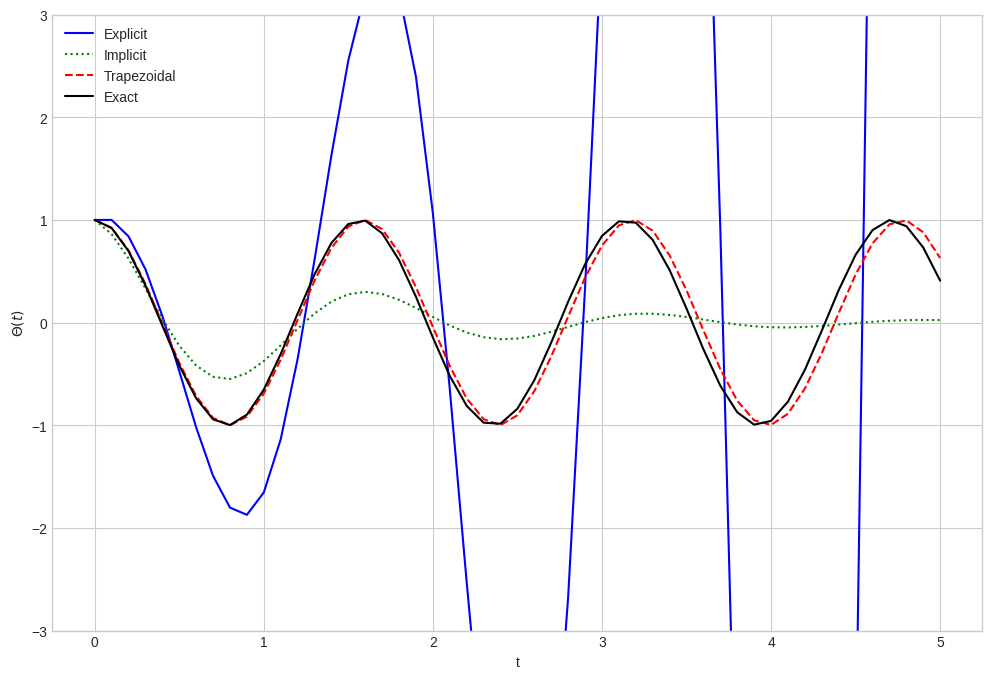

In [2]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

## 22.5 Predictor-Corrector and Runge Kutta Methods
Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the $F$ function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state. It uses two formulas: the predictor and the corrector. The predictor is an explicit formula and first estimates the solution at $t_{j+1}$, i.e., we can use a previous method to finish this step. After we get the solution $S(t_{j+1})$, we can apply the corrector to improve the accuracy.

The midpoint method has a predictor step of:

$\begin{equation*}
S\left(t_j+\frac{h}{2}\right)=S(t_j)+\frac{h}{2}F(t_j,S(t_j))
\end{equation*}$

which is the prediction of the solution value halfway between $t_j$ and $t_{j+1}$. It then computes the corrector step:

$S(t_{j+1})=S(t_j)+hF(t_j+\frac{h}{2},S(t_j+\frac{h}{2}))$

which computes the solution at $S(t_{j+1})$ from $S(t_j)$ but using the derivative from $S(t_j+\frac{h}{2})$.

Runge Kutta (RK) methods are one of the most widely used methods for solving ODEs. It has greater accuracy due ot using more terms of the Taylor series, of which Euler only uses two. The work of calculating the higher derivatives is not necessary since RK methods are based on truncated Taylor series.

## 22.6 Python ODE Solvers
In *scipy*, there are built-in functions to solve IVPs. The most common one used is *scipy.integrate.solve_ivp* function. Its construction is the following:
Let $F$ be a function object to the fuction that computes

$\begin{equation*}
\frac{dS(t)}{dt}=F(t,S(t)))
\end{equation*}$

$S(t0)=S0$

where $t$ is a one-dimensional independent variable (time), $S(t)$ is an n-dimensional vector-valued function (state), and the $F(t,S(t))$ defines the differential equations. $S0$ is an initial value for $S$. The function $F$ must have the form $dS=F(t,S)$, although the name does not have to be $F$. The goal is to find the $S(t)$ approximately satisfying the differential equations, given the initial value $S(t0)=S0$.

The way we use the solver to solve the differential equation is: `solve_ivp(fun, t_span,s0, method='RK45', t_eval=None)`, where *fun* takes in the function in the right-hand side of the system, *t_span* is the interval of integration *(t0,tf)*, where *t0* is the start and *tf* is the end of the interval, *s0* is the initial state. There are a couple of methods that we can choose, the default is ‘RK45’, which is the explicit Runge-Kutta method of order 5(4). *t_eval* takes in the times at which to store the computed solution, and must be sorted and lie within *t_span*.

Consider the ODE:

$\frac{dS(t)}{dt}=\cos(t)$

foran initial value $S_0=0$. The exact solution is $S(t)=\sin(t)$. This will be plotted over the interval $[0,\pi]$.

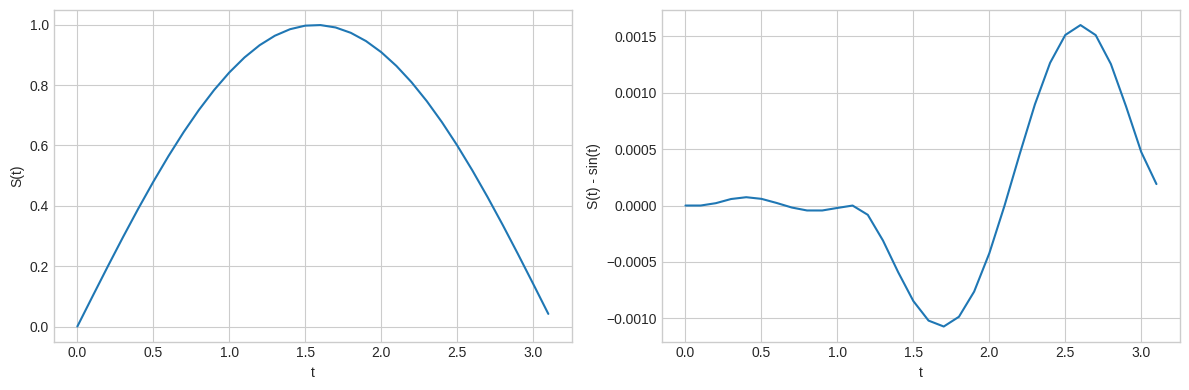

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-whitegrid')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The above left figure shows the integration of $\frac{dS(t)}{dt}=cos(t)$ with *solve_ivp*. The right figure computes the difference between the solution of the integration by *solve_ivp* and the evalution of the analytical solution to this ODE. As can be seen from the figure, the difference between the approximate and exact solution to this ODE is small. Also, we can control the relative and absolute tolerances using the rtol and atol arguments, the solver keeps the local error estimates less than $\operatorname{atol}+\operatorname{rtol}∗\operatorname{abs}(S)$. The default values are 1e-3 for rtol and 1e-6 for atol.

If we want a smaller difference between the approximate and exact solutions, we could do the following:

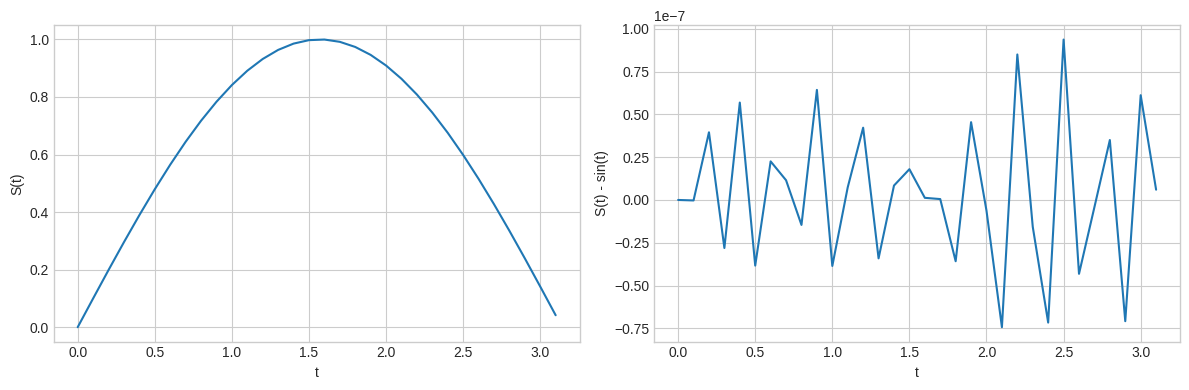

In [4]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()